##Code to generate and save Gaussian test data for PULearning validation

In [58]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
test_fraction = 0.2
num_unlabeled_negatives = 800 #because our code, this set will end up in training automatically
num_positive_inTrain = 800 #labeled and unlabeled
fraction_of_positives_thatAreUnlabeled = 0.8

num_labeledpositives_inTrain = int(round(num_positive_inTrain * (1.-fraction_of_positives_thatAreUnlabeled)))
num_unlabeled_positives = num_positive_inTrain - num_labeledpositives_inTrain

num_labeled_positives = num_labeledpositives_inTrain/(1.-test_fraction) #both labeled and unlabeled
    
num_positives_inTest = num_labeled_positives * test_fraction
num_labeled_negatives = num_positives_inTest
                                   
#unlabeled_factor = num_unlabeled_positives/num_labeledpositives_inTrain

#fractionOfPositives_labeled = num_labeled_positives/num_positive

num_positive = num_labeled_positives + num_unlabeled_positives
                                   
num_negative = num_labeled_negatives + num_unlabeled_negatives


num_positive = int(num_positive)
num_negative = int(num_negative)

fractionOfPositives_labeled = num_labeled_positives/num_positive
fractionOfNegatives_labeled = num_labeled_negatives/num_negative

In [74]:
# define constants


print ("Positive Train , Negative train (positives), Negative train (negatives) , Positive test , Negative test",
      num_positive*fractionOfPositives_labeled*(1.-test_fraction),
      num_positive*(1.-fractionOfPositives_labeled),
      num_negative*(1.-fractionOfNegatives_labeled ),
      num_positive*fractionOfPositives_labeled*test_fraction,
      num_negative*fractionOfNegatives_labeled
      )      
#define Gaussians mean and covariance matrices

Gaussian1_mean = [0,0]
Gaussian2_mean = [1,1]

Gaussian1_cov = [[1, 0.5], [0.5, 1]]
Gaussian2_cov = [[1, -0.5], [-0.5, 1]]



('Positive Train , Negative train (positives), Negative train (negatives) , Positive test , Negative test', 160.0, 640.0, 800.0, 40.0, 40.0)


In [75]:
# random generated data

positive_data = np.random.multivariate_normal(Gaussian1_mean,Gaussian1_cov, num_positive)
negative_data = np.random.multivariate_normal(Gaussian2_mean,Gaussian2_cov, num_negative)

positive_data_quadraticTerms = np.square(positive_data)
negative_data_quadraticTerms = np.square(negative_data)

positiveData_features = np.column_stack((positive_data, positive_data_quadraticTerms))
negativeData_features = np.column_stack((negative_data, negative_data_quadraticTerms))

positiveData_training_features = positiveData_features[0:round(num_positive*(1.-fractionOfPositives_labeled*test_fraction)),:]
unlabeledData_negative_training_features = negativeData_features[0:round(num_unlabeled_negatives),:]

training_features = np.vstack((positiveData_training_features, unlabeledData_negative_training_features))
training_labels = [1]*int(round(num_labeled_positives*(1.-test_fraction)))+[0]*int(round(num_unlabeled_positives+num_unlabeled_negatives))

features = np.vstack((positiveData_features,negativeData_features))
num_positive_labels = math.trunc(num_positive*fractionOfPositives_labeled)
num_negative_labels = math.trunc(num_negative*fractionOfNegatives_labeled)
#label = [1]*num_positive_labels + [0]*(num_positive-num_positive_labels)+ [0]*(num_negative-num_negative_labels) + [-1]*num_negative_labels
label = [1]*num_positive + [-1]*num_negative
pulabel_export = [1]*num_positive_labels + [0]*(num_positive-num_positive_labels)+ [0]*(num_negative-num_negative_labels) + [-1]*num_negative_labels
pulabel = [1]*num_positive_labels + [0]*(num_positive-num_positive_labels)+ [0]*(num_negative-num_negative_labels) + [-1]*num_negative_labels
data = np.column_stack((pulabel_export, features))
np.random.shuffle(data)
df = pd.DataFrame(data, columns=['label','x','y', 'x**2', 'y**2'])

In [76]:
df.to_csv("../data/test7_Gaussians_formatted.csv")

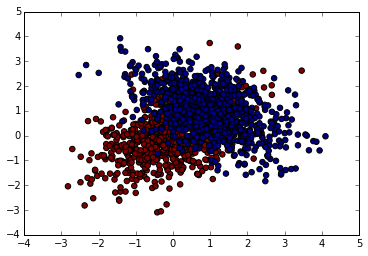

In [77]:
plt.figure()
plt.scatter(features[:, 0], features[:, 1], s=30, c=label)
plt.show()

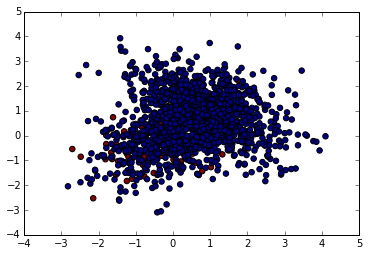

In [78]:
plt.figure()
plt.scatter(training_features[:, 0], training_features[:, 1], s=30, c=training_labels)
plt.show()